# ICE3_Siyuan_Gu

## Simple linear regression 

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:/Users/gusiy/Desktop/HUDK4050EDM')

import dataset

<AxesSubplot:xlabel='graduation 2010-11', ylabel='college enroll 2010-11'>

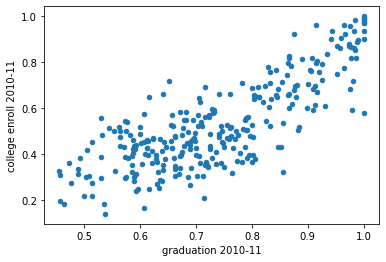

In [3]:
school = pd.read_csv("ICE1_Data.csv")
graduationCollege = school[['graduation 2010-11', 'college enroll 2010-11']].dropna()


graduation = graduationCollege.loc[:,"graduation 2010-11"].values.reshape(-1, 1)
college = graduationCollege.loc[:,"college enroll 2010-11"].values.reshape(-1, 1)


graduationCollege.plot.scatter(x = 'graduation 2010-11', y = 'college enroll 2010-11')

Next, fit the model.

* Step 1. Create a model.
* Step 2. Fit the model with **graduation** and **college** data.
* Step 3. Get the information from calling **.intercept_** and **.ceof_**.

In [4]:
model = LinearRegression()
model.fit(graduation, college)
print("The intercept is: ", model.intercept_)
print("The slope is: ", model.coef_)

The intercept is:  [-0.27965123]
The slope is:  [[1.09914898]]


call **.predict()** to use x as the input and get predicted ys.

In [5]:
c_pred = model.predict(graduation)

Draw a scatter plot with adding a red line which describes the linear relationship between graduation rate against predicted college enroll.

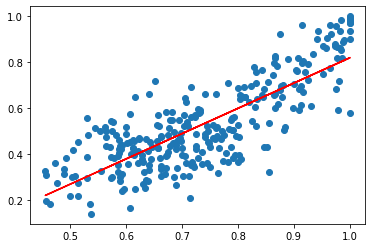

In [6]:
plt.scatter(graduation, college)
plt.plot(graduation, c_pred, color = 'red')
plt.show()

## A more realistic example with multiple independent variables

Documentation of `ICE3data.csv`.

* `stid` = student id
* `year` = year student watched video
* `participation` = whether or not the student opened the video
* `watch.time` = how long the student watched the video for
* `confusion.points` = how many times a student rewatched a section of a video
* `key.points` = how many times a student skipped or increased the speed of a video

We will try to build a regressor to predict how long the student will watch a video for:

In [8]:
videoData = pd.read_csv("ICE3_data.csv")
videoData

,stid,year,video,participation,watch.time,confusion.points,key.points
0,1,2018,A,1,16.5,6,6
1,2,2018,A,0,0.0,0,0
2,3,2018,A,1,9.0,4,6
3,4,2018,A,1,20.0,8,5
4,5,2018,A,1,12.0,8,5
...,...,...,...,...,...,...,...
295,56,2019,E,1,12.0,6,2
296,57,2019,E,1,17.5,10,1
297,58,2019,E,1,6.0,4,1
298,59,2019,E,0,0.0,0,0


 Then we can call `dataFrame.describe()` to first take a quick glance at what is going on. Obviously, we won't be needing `stid` and `year`. And they should really be stored as categorical variables instead of numerical.

In [9]:
videoData.describe()

,stid,year,participation,watch.time,confusion.points,key.points
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,30.500000,2018.500000,0.743333,9.302500,4.426667,2.326667
std,17.347038,0.500835,0.437524,8.396475,3.606658,1.921526
min,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,2018.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,2018.500000,1.000000,8.375000,5.000000,2.000000
75%,45.250000,2019.000000,1.000000,15.750000,8.000000,4.000000
max,60.000000,2019.000000,1.000000,32.500000,13.000000,7.000000


Again, plot a a scatter plot matrix to check (a) the potential linearity among variables, and (b) the distribution of each variable.

array([[<AxesSubplot:xlabel='participation', ylabel='participation'>,
        <AxesSubplot:xlabel='watch.time', ylabel='participation'>,
        <AxesSubplot:xlabel='confusion.points', ylabel='participation'>,
        <AxesSubplot:xlabel='key.points', ylabel='participation'>],
       [<AxesSubplot:xlabel='participation', ylabel='watch.time'>,
        <AxesSubplot:xlabel='watch.time', ylabel='watch.time'>,
        <AxesSubplot:xlabel='confusion.points', ylabel='watch.time'>,
        <AxesSubplot:xlabel='key.points', ylabel='watch.time'>],
       [<AxesSubplot:xlabel='participation', ylabel='confusion.points'>,
        <AxesSubplot:xlabel='watch.time', ylabel='confusion.points'>,
        <AxesSubplot:xlabel='confusion.points', ylabel='confusion.points'>,
        <AxesSubplot:xlabel='key.points', ylabel='confusion.points'>],
       [<AxesSubplot:xlabel='participation', ylabel='key.points'>,
        <AxesSubplot:xlabel='watch.time', ylabel='key.points'>,
        <AxesSubplot:xlabel='confus

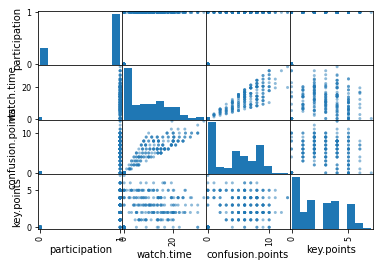

In [10]:
pd.plotting.scatter_matrix(videoData.iloc[:,3:])

#### A small challenge

array([[<AxesSubplot:xlabel='participation', ylabel='participation'>,
        <AxesSubplot:xlabel='watch.time', ylabel='participation'>,
        <AxesSubplot:xlabel='confusion.points', ylabel='participation'>,
        <AxesSubplot:xlabel='key.points', ylabel='participation'>],
       [<AxesSubplot:xlabel='participation', ylabel='watch.time'>,
        <AxesSubplot:xlabel='watch.time', ylabel='watch.time'>,
        <AxesSubplot:xlabel='confusion.points', ylabel='watch.time'>,
        <AxesSubplot:xlabel='key.points', ylabel='watch.time'>],
       [<AxesSubplot:xlabel='participation', ylabel='confusion.points'>,
        <AxesSubplot:xlabel='watch.time', ylabel='confusion.points'>,
        <AxesSubplot:xlabel='confusion.points', ylabel='confusion.points'>,
        <AxesSubplot:xlabel='key.points', ylabel='confusion.points'>],
       [<AxesSubplot:xlabel='participation', ylabel='key.points'>,
        <AxesSubplot:xlabel='watch.time', ylabel='key.points'>,
        <AxesSubplot:xlabel='confus

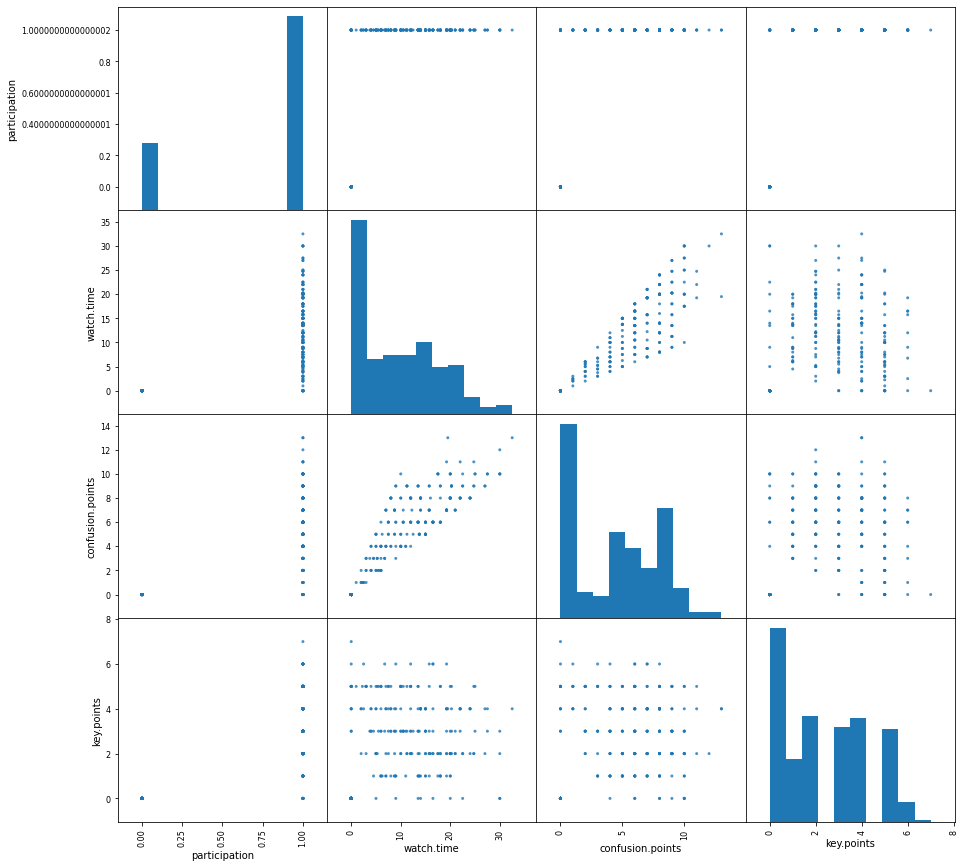

In [42]:
### Normal Trans
pd.plotting.scatter_matrix(videoData.iloc[:,3:],alpha=0.8,figsize=(15,15),range_padding=0.3)

By adjusting the value of `range_padding`, the watch time, confusion points, and key points look normal.

It's time to use all the variables to predict `watch.time`.

 The formula should be:
 $videowatch = b_0 + b_1 * participation + b_2 * confusionpoints + b_3 * keypoints$

Now using a different methond to create the X matrix because it contains multiple Xs.

In [43]:
Xs = videoData[["participation", "confusion.points", "key.points"]].to_numpy()
watchTime = videoData.loc[:,"watch.time"].values.reshape(-1, 1)

Then fit the model with Xs and watch_time as y.

In [44]:
videoModel = LinearRegression()
videoModel.fit(Xs, watchTime)
print("The intercept is: ", videoModel.intercept_)
print("The slope is: ", videoModel.coef_)

The intercept is:  [-3.55271368e-15]
The slope is:  [[ 0.55757518  2.08731237 -0.15120358]]


Let's make it more readable by calling `OLS` from `statsmodels`.

In [45]:
from statsmodels.api import OLS
videoModelOLS = OLS(watchTime, Xs)
videoModelOLSFit = videoModelOLS.fit()
print(videoModelOLSFit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              1117.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                   2.36e-161
Time:                        03:12:29   Log-Likelihood:                         -807.73
No. Observations:                 300   AIC:                                      1621.
Df Residuals:                     297   BIC:                                      1633.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Another small challenge

How would interpret the results, How can we interpret individual features/predictors? What would you do next?

Ans: 
* The **R-squared** is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.919 would mean our model explains 91.9% of the change in our ‘watch_time’ variable. 
* `And the **Adj. R-squared** is 0.918 which is nearly equal to the R-squared value so the Xs are contributing to the model properly. 
* **F-statistic** we could pick an alpha value and quoting an F-table to test the statistically significance of our groups of variables. 
* **Prob (F-Statistic)** uses this number to tell us the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 2.36* 10^(-161) chance of this.
* **Log-likelihood** is a numerical signifier of the likelihood that our produced model produced the given data. It is used to compare coefficient values for each variable in the process of creating the model. 
* **AIC** and **BIC** are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.

Moreover, we can check the **coef** to see the correlation between each X and Y. Then the **std err** tell us the amount of variation in the coefficient throughout its data points. The **P>|t|** uses the t statistic to produce the p value. By check these values for x1,x2 and x3, with common alpha level 0.05, we know that x2 may be the only variable that pass the t-test. So next we are going to build a model that predict `watch_time` by inputing `confusion.points`.  